### 利用Python REPL 工具创建智能体

In [2]:
import os
from dotenv import load_dotenv
from langchain.agents.agent_types import AgentType
from langchain_community.chat_models import ChatOllama 
from langchain_experimental.agents.agent_toolkits.python.base import create_python_agent
from langchain_experimental.tools import PythonREPLTool

load_dotenv()

# 创建Ollama聊天模型实例 - 调用本地大模型
model = ChatOllama(
    model="deepseek-coder-v2:16b",  # 代码生成的模型
    temperature=0,
    base_url="http://localhost:11434"  # Ollama默认本地端口
)

agent_executor = create_python_agent(
    llm=model,  # 使用Ollama模型
    tool=PythonREPLTool(),
    verbose=True,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)


/tmp/ipykernel_79972/3963032171.py:11: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  model = ChatOllama(


### 检查默认提示词

In [46]:
print(agent_executor.agent.llm_chain.prompt.template)

You are an agent designed to write and execute python code to answer questions.
You have access to a python REPL, which you can use to execute python code.
If you get an error, debug your code and try again.
Only use the output of your code to answer the question. 
You might know the answer without running any code, but you should still run the code to get the answer.
If it does not seem like you can write code to answer the question, just return "I don't know" as the answer.


Python_REPL - A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [Python_REPL]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N time

### 基于篮球运动员的样本属性生成散点图:



> Entering new AgentExecutor chain...
 To create a scatter plot graph in Seaborn talk mode for each player where the y-axis represents the number of points, the x-axis represents the number of rebounds, using 'o' as the marker, and labeling each point with the player's name, I need to follow these steps:

1. Create a DataFrame from the given player stats.
2. Use Seaborn to create scatter plots for each player.
3. Set the title of the plot to "Team Players."
4. Label each point with the player's name.

Action: Python_REPL

Action Input: 
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the given player stats
data = {
    'Player': ['A', 'B', 'C', 'D', 'E'],
    'Points': [38, 28, 19, 12, 7],
    'Rebounds': [10, 9, 6, 4, 2],
    'Assists': [7, 6, 3, 2, 1]
}
df = pd.DataFrame(data)

# Set the Seaborn theme to "talk" for better readability
sns.set_context("talk")

# Create a scatter plot for each player
plt.figure(figsize=(10

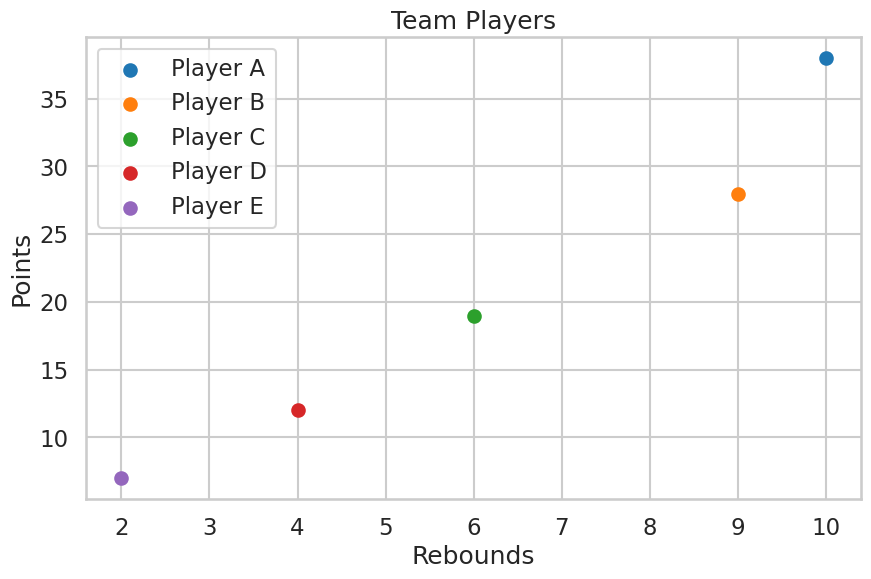


Observation: 
Thought: The scatter plot graph has been successfully created with each player's data plotted as points on the y-axis representing points and the x-axis representing rebounds, using 'o' as markers. Each point is labeled with the player's name, and the overall title of the plot is set to "Team Players."

Final Answer: The scatter plot graph has been created successfully for each player, where the y-axis represents the number of points, the x-axis represents the number of rebounds, using 'o' as markers. Each point is labeled with the player's name and the overall title of the plot is "Team Players."

> Finished chain.


'The scatter plot graph has been created successfully for each player, where the y-axis represents the number of points, the x-axis represents the number of rebounds, using \'o\' as markers. Each point is labeled with the player\'s name and the overall title of the plot is "Team Players."'

In [53]:
query = """
In a different basketball game, we have the following player stats:
- Player A: 38 points, 10 rebounds, 7 assists
- Player B: 28 points, 9 rebounds, 6 assists
- Player C: 19 points, 6 rebounds, 3 assists
- Player D: 12 points, 4 rebounds, 2 assists
- Player E: 7 points, 2 rebounds, 1 assist

Could you create a scatter plot graph in Seaborn talk mode for each player, where the y-axis represents the number of points, the x-axis represents the number of rebounds, and use 'o' as the marker? Additionally, please label each point with the player's name and set the title as "Team Players."
"""

agent_executor.run(query)

### 房屋价格预测

In [3]:
query = """
I want to predict the price of a house given the following information: 
- the number of rooms 
- the number of bathrooms 
- the size of the house in square meters

Design and train a regression model to predict the price of a house. Generate and use synthetic data to train the model. 
Once the model is trained, tell me the price of a house with the following features: 
- 2 rooms 
- 1 bathroom 
- 100 square meters
"""

agent_executor.run(query)

/tmp/ipykernel_79972/870146621.py:14: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  agent_executor.run(query)




> Entering new AgentExecutor chain...


Python REPL can execute arbitrary code. Use with caution.


 To design and train a regression model for predicting the price of a house based on its number of rooms, number of bathrooms, and size in square meters, we can use Python with libraries such as scikit-learn to create a synthetic dataset, train a linear regression model, and then predict the price for given features.

Action:
Python_REPL

Action Input: 
```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
n_samples = 100
rooms = np.random.randint(1, 5, size=n_samples)
bathrooms = np.random.randint(1, 3, size=n_samples)
size = np.random.uniform(50, 200, size=n_samples)
price = (rooms * 100 + bathrooms * 200 + size * 10).astype(int)

# Create a DataFrame
data = pd.DataFrame({'rooms': rooms, 'bathrooms': bathrooms, 'size': size, 'price': price})

# Split the data into training and testing se

/root/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Observation: Mean Squared Error: 0.10921735593136879
R^2 Score: 0.9999994691027934
Predicted Price: 1399

Thought: The model has been trained successfully, and the predicted price for a house with 2 rooms, 1 bathroom, and 100 square meters is calculated.

Final Answer: The predicted price of a house with 2 rooms, 1 bathroom, and 100 square meters is $1399.

> Finished chain.


'The predicted price of a house with 2 rooms, 1 bathroom, and 100 square meters is $1399.'

### HVAC智能优化

In [25]:
query = """
Please strictly follow the steps below to solve the problem
1. Analyze the problem and plan solutions
2. Only enter 'Python_REPL' in Action:
3. Only enter the code in Action Input:
4. Execute only one code snippet at a time
5. Finally, return the result using Final Answer:


**Problem**:

You are tasked with optimizing the HVAC setpoints in a smart building to minimize energy costs while ensuring occupant comfort. The building has three zones, after the HVAC system is activated, all rooms will maintain a same temperature. The cost function for energy consumption is defined as:

- Zone 1: Energy cost = $0.05 per degree per hour
- Zone 2: Energy cost = $0.07 per degree per hour
- Zone 3: Energy cost = $0.06 per degree per hour

You need to find a optimal temperature for the three zones to minimize the energy cost while maintaining a comfortable temperature. The initial temperatures in each zone are as follows:

- Zone 1: 72°F
- Zone 2: 75°F
- Zone 3: 70°F

The comfort range for each zone is as follows:
- Zone 1: 70°F to 74°F
- Zone 2: 73°F to 77°F
- Zone 3: 68°F to 72°F

**Question**:

What is the minimum total energy cost (in dollars per hour) you can achieve by adjusting the temperature for the three zones within their respective comfort ranges?

"""

agent_executor.run(query)



> Entering new AgentExecutor chain...
 To solve this problem, we need to find a common temperature that minimizes the total energy cost while keeping each zone within its comfort range. We will evaluate temperatures within these ranges and calculate the total energy cost for each scenario. The goal is to find the temperature that results in the lowest possible total energy cost.

Action: Python_REPL

Action Input: 
```python
# Define the energy costs per degree per hour for each zone
cost_zone1 = 0.05
cost_zone2 = 0.07
cost_zone3 = 0.06

# Define the comfort ranges for each zone
comfort_range_zone1 = range(70, 75)
comfort_range_zone2 = range(73, 78)
comfort_range_zone3 = range(68, 73)

# Initialize minimum total energy cost to a large number
min_total_cost = float('inf')
optimal_temperature = None

# Iterate over possible temperatures within the comfort ranges
for temp in range(max(comfort_range_zone1.start, comfort_range_zone2.start, comfort_range_zone3.start), 
                  mi

'The minimum total energy cost is $0.37 per hour with a common temperature of 73°F.'

In [26]:
# Define the energy costs per degree per hour for each zone
cost_zone1 = 0.05
cost_zone2 = 0.07
cost_zone3 = 0.06

# Define the comfort ranges for each zone
comfort_range_zone1 = range(70, 75)
comfort_range_zone2 = range(73, 78)
comfort_range_zone3 = range(68, 73)

# Initialize minimum total energy cost to a large number
min_total_cost = float('inf')
optimal_temperature = None

# Iterate over possible temperatures within the comfort ranges
for temp in range(max(comfort_range_zone1.start, comfort_range_zone2.start, comfort_range_zone3.start), 
                  min(comfort_range_zone1.stop, comfort_range_zone2.stop, comfort_range_zone3.stop) + 1):
    # Calculate the energy cost for each zone based on the temperature deviation from the target temperature
    cost_zone1 = abs(temp - 72) * cost_zone1
    cost_zone2 = abs(temp - 75) * cost_zone2
    cost_zone3 = abs(temp - 70) * cost_zone3
    
    # Calculate the total energy cost for all zones
    total_cost = cost_zone1 + cost_zone2 + cost_zone3
    
    # Update the minimum total energy cost and optimal temperature if a new minimum is found
    if total_cost < min_total_cost:
        min_total_cost = total_cost
        optimal_temperature = temp

# Print the result
print(f"The minimum total energy cost is ${min_total_cost:.2f} per hour with a common temperature of {optimal_temperature}°F.")

The minimum total energy cost is $0.37 per hour with a common temperature of 73°F.
